<a href="https://colab.research.google.com/github/jorgewellison/classifiers-tcc/blob/main/Decision-tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Configurações iniciais**

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


**Importação das bibliotecas**

In [60]:
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier, export
from sklearn.model_selection import KFold
from yellowbrick.classifier import ConfusionMatrix
import graphviz
from sklearn.tree import export_graphviz
from sklearn.model_selection import cross_val_score, cross_val_predict, cross_validate
from sklearn import preprocessing, tree


**Importando previsores e classe (tratados no pré-processamento)**

previsores -> variáveis independentes - X

classe -> variável dependente - y

In [3]:
previsores = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/previsores_.csv") 
classe_inc = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_inc.csv") 
classe_mort = pd.read_csv("/content/drive/My Drive/Colab Notebooks/covid-idhm/classe_mort.csv") 


**Criação e treinamento do modelo**

In [6]:
arvore_inc = DecisionTreeClassifier()
arvore_inc.fit(previsores, classe_inc)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [7]:
arvore_mort = DecisionTreeClassifier()
arvore_mort.fit(previsores, classe_mort)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Criação do KFold com 10 iterações e Shuffle para embaralhar as linhas, desagrupando os municipios de seus estados**

---



In [81]:
cv = KFold(n_splits=10, random_state=0, shuffle=True)

In [55]:
scoring = {'accuracy' : make_scorer(accuracy_score), 
           'precision' : make_scorer(precision_score, average = 'micro'),
           'recall' : make_scorer(recall_score, average = 'micro'), 
           'f1_score' : make_scorer(f1_score, average = 'micro')}

**Teste com validação cruzada**

In [82]:
#a função cross_val_score recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de fodls e o metodo de avaliação

scores = cross_validate(arvore_inc, 
                        previsores, 
                        classe_inc,
                        cv=cv,
                        scoring=scoring,
                        return_train_score=False)

In [78]:
scores

{'fit_time': array([0.48969007, 0.35803986, 0.45551443, 0.48011827, 0.47732162,
        0.49319673, 0.41508126, 0.4155364 , 0.46190333, 0.48652315]),
 'score_time': array([0.00447989, 0.00348186, 0.00450325, 0.00454974, 0.00442624,
        0.00686693, 0.00339746, 0.00497675, 0.00441527, 0.00339389]),
 'test_accuracy': array([0.57809695, 0.62477558, 0.56193896, 0.60861759, 0.59066427,
        0.55755396, 0.56294964, 0.60251799, 0.57374101, 0.57194245]),
 'test_f1_score': array([0.57809695, 0.62477558, 0.56193896, 0.60861759, 0.59066427,
        0.55755396, 0.56294964, 0.60251799, 0.57374101, 0.57194245]),
 'test_precision': array([0.57809695, 0.62477558, 0.56193896, 0.60861759, 0.59066427,
        0.55755396, 0.56294964, 0.60251799, 0.57374101, 0.57194245]),
 'test_recall': array([0.57809695, 0.62477558, 0.56193896, 0.60861759, 0.59066427,
        0.55755396, 0.56294964, 0.60251799, 0.57374101, 0.57194245])}

In [83]:
#a função cross_val_score recebe por parâmetro o modelo
#todos os dados para treino, os dados de classes, a quandidade de fodls e o metodo de avaliação

scores2 = cross_validate(arvore_mort, 
                         previsores, 
                         classe_mort,
                         scoring=scoring,
                         cv=cv,
                         return_train_score=False)

In [84]:
scores2

{'fit_time': array([0.38885045, 0.43545437, 0.47047186, 0.45097685, 0.4671452 ,
        0.46535206, 0.48025298, 0.46376753, 0.44988108, 0.48883605]),
 'score_time': array([0.00358367, 0.00474811, 0.00486565, 0.00492001, 0.00473666,
        0.00457907, 0.00470591, 0.00457597, 0.00476384, 0.00479031]),
 'test_accuracy': array([0.53500898, 0.54578097, 0.52962298, 0.51346499, 0.53141831,
        0.51258993, 0.51978417, 0.5557554 , 0.54136691, 0.53597122]),
 'test_f1_score': array([0.53500898, 0.54578097, 0.52962298, 0.51346499, 0.53141831,
        0.51258993, 0.51978417, 0.5557554 , 0.54136691, 0.53597122]),
 'test_precision': array([0.53500898, 0.54578097, 0.52962298, 0.51346499, 0.53141831,
        0.51258993, 0.51978417, 0.5557554 , 0.54136691, 0.53597122]),
 'test_recall': array([0.53500898, 0.54578097, 0.52962298, 0.51346499, 0.53141831,
        0.51258993, 0.51978417, 0.5557554 , 0.54136691, 0.53597122])}

**Imprimindo os resultados dos folds**

In [ ]:
scores #array com resultado de cada execução (previsão)

array([0.60861759, 0.60682226, 0.56552962, 0.61041293, 0.59425494,
       0.55755396, 0.55395683, 0.58992806, 0.56834532, 0.58453237])

In [ ]:
scores2 #array com resultado de cada execução (previsão)

array([0.52962298, 0.55116697, 0.53680431, 0.51346499, 0.51526032,
       0.53597122, 0.49460432, 0.55395683, 0.53776978, 0.54136691])

# **Predição e Matriz de confusão**

### Predição e Matriz da incidência

In [ ]:
predictions = cross_val_predict(arvore_inc, previsores, classe_inc, cv=cv)
confusao = confusion_matrix(classe_inc, predictions)
confusao

array([[1624,  210,  800],
       [ 199,  100,  132],
       [ 823,  177, 1500]])

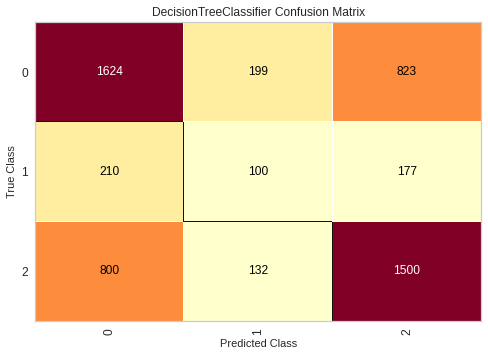

In [ ]:
v = ConfusionMatrix(DecisionTreeClassifier())
v.fit(previsores, classe_inc)
v.score(previsores, predictions)
v.poof()

### Predição e Matriz da mortalidade

In [ ]:
predictions2 = cross_val_predict(arvore_mort, previsores, classe_mort, cv=cv)
confusao2 = confusion_matrix(classe_mort, predictions2)
confusao2

array([[1173,  252,  737],
       [ 238,  269,  322],
       [ 700,  368, 1506]])

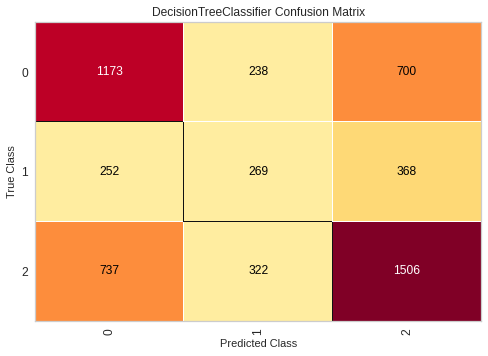

In [ ]:
v2 = ConfusionMatrix(DecisionTreeClassifier())
v2.fit(previsores, classe_mort)
v2.score(previsores, predictions2)
v2.poof()

**Taxa de acerto**

In [ ]:
scores.mean() #méd

0.5839953889671028

In [ ]:
scores2.mean()

0.5309988633868489

### **Métricas de avaliação**

In [ ]:
#Acurácia da predição de incidência
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.584 (0.020)


In [ ]:
#Precisão da predição de incidência


In [ ]:
#Acurácia da predição de mortalidade
print('Accuracy: %.3f (%.3f)' % (mean(scores2), std(scores2)))

Accuracy: 0.531 (0.017)


**Exportação da árvore de decisão do algoritmo de treinamento, com o formato .dot para posterior visualização**

In [ ]:
export_graphviz(arvore_inc, 
                out_file = 'tree_inc.dot',
                feature_names = ['media_mes', 'expec_vida', 'taxa_fecund','MORT1','%sobreviver_60a','taxa_envelh','expec_anos_estudo_18','T_ANALF11A14','T_ANALF25M','T_ATRASO_0_BASICO','T_ATRASO_2_BASICO','T_FLPRE','T_FLSUPER','T_FREQSUPER1517','T_MED25M','T_SUPER25M','GINI','PIND','PINDCRI','PMPOB','PMPOBCRI','RDPC','CPR','EMP','P_AGRO','P_COM','P_CONSTR','P_EXTR','P_FORMAL','P_FUND','P_MED','P_SERV','P_SIUP','P_SUPER','T_DES2529','TRABCC','TRABPUB','TRABSC','T_AGUA','T_BANAGUA','T_DENS','T_LIXO','T_LUZ','AGUA_ESGOTO','PAREDE','T_CRIFUNDIN_TODOS','T_FORA4A5','T_FORA6A14','T_FUNDIN_TODOS','T_FUNDIN_TODOS_MMEIO','T_FUNDIN18MINF','T_M10A14CF','T_M15A17CF','T_MULCHEFEFIF014','T_NESTUDA_NTRAB_MMEIO','T_OCUPDESLOC_1','T_RMAXIDOSO','T_SLUZ','HOMEMTOT','MULHERTOT','pesoRUR','pesotot','pesourb','POP','IDHM','IDHM_E','IDHM_L','IDHM_R','estimated_population_2019'],
                class_names = ['0', '1', '2'],
                filled = True,
                leaves_parallel=True)

In [ ]:
export_graphviz(arvore_mort, 
                out_file = 'tree_mort.dot',
                feature_names = ['media_mes', 'expec_vida', 'taxa_fecund','MORT1','%sobreviver_60a','taxa_envelh','expec_anos_estudo_18','T_ANALF11A14','T_ANALF25M','T_ATRASO_0_BASICO','T_ATRASO_2_BASICO','T_FLPRE','T_FLSUPER','T_FREQSUPER1517','T_MED25M','T_SUPER25M','GINI','PIND','PINDCRI','PMPOB','PMPOBCRI','RDPC','CPR','EMP','P_AGRO','P_COM','P_CONSTR','P_EXTR','P_FORMAL','P_FUND','P_MED','P_SERV','P_SIUP','P_SUPER','T_DES2529','TRABCC','TRABPUB','TRABSC','T_AGUA','T_BANAGUA','T_DENS','T_LIXO','T_LUZ','AGUA_ESGOTO','PAREDE','T_CRIFUNDIN_TODOS','T_FORA4A5','T_FORA6A14','T_FUNDIN_TODOS','T_FUNDIN_TODOS_MMEIO','T_FUNDIN18MINF','T_M10A14CF','T_M15A17CF','T_MULCHEFEFIF014','T_NESTUDA_NTRAB_MMEIO','T_OCUPDESLOC_1','T_RMAXIDOSO','T_SLUZ','HOMEMTOT','MULHERTOT','pesoRUR','pesotot','pesourb','POP','IDHM','IDHM_E','IDHM_L','IDHM_R','estimated_population_2019'],
                class_names = ['0', '1', '2'],
                filled = True,
                leaves_parallel=True)